# <big><font color='#D35400'>REGRESION LINEAL CON SCIKIT-LEARN</font><big>

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <font color='#8E44AD'>Creamos el conjunto de datos para trabajar y lo graficamos</font>

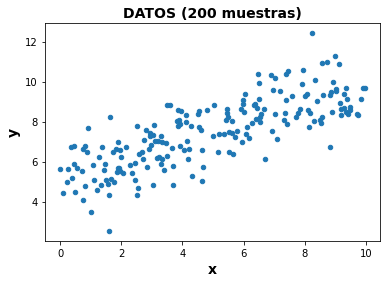

In [10]:
# Creamos el conjunto de datos para trabajar
x_data = np.linspace(0.0,10.0,500)      # Creamos 500 valores de x equidistantes entre 0 y 10.

np.random.seed(652)                     # seed obtiene números al azar, pero siempre elegirá los mismos en el mismo orden.
noise = np.random.randn(len(x_data))    # obtengo 500 números aleatorios ya predeterminados por seed.

y_data =  (0.5 * x_data ) + 5 + noise   # Obtenemos 500 valores de y que seguirán la tendencia de y=0.5x+5

#### INPUTS para pandas y grafico
x = 'x'
y = 'y'
samples = 200      # numero de muestras (pares x,y) a graficar

#### Lo convertimos en Pandas Dataframe para agregar versatilidad al gráfico 
x_df = pd.DataFrame(x_data,columns=[x])
y_df = pd.DataFrame(y_data,columns=[y])
my_df = pd.concat([x_df,y_df],axis=1)


#### Grafico
my_df.sample(n=samples).plot(kind='scatter',x=x,y=y)    

plt.xlabel(x, fontsize=14,fontweight="bold")
plt.ylabel(y, fontsize=14,fontweight="bold")
plt.title(f'DATOS ({samples} muestras)',fontsize=14,fontweight="bold")
plt.show()

# <font color='#8E44AD'>Entrenamos el modelo y calculamos m,b</font>

In [11]:
X = my_df[['x']]    
Y = my_df[['y']]
linreg = LinearRegression()

### Entreno el modelo
linreg.fit(X,Y)
print(f'm={float(linreg.coef_):.3f}\nb={float(linreg.intercept_):.5f}')
print(f'y = {float(linreg.coef_):.3f}x + {float(linreg.intercept_):2.3f}')

m=0.507
b=4.95335
y = 0.507x + 4.953


# <font color='#8E44AD'>Utilizamos predict y obtenemos R2 y MSE </font>

In [15]:
my_df['Y_pred'] = linreg.predict(my_df[['x']])

In [27]:
mse = mean_squared_error(my_df['y'], my_df['Y_pred'])
r2 = r2_score(my_df['y'], my_df['Y_pred'])
print(f"MSE = {mse:.3f}")
print(f"R\u00b2 = {r2:.3f}")

MSE = 1.100
R² = 0.662


# <font color='#8E44AD'>Graficamos los datos originales junto con la recta de regresión lineal</font>

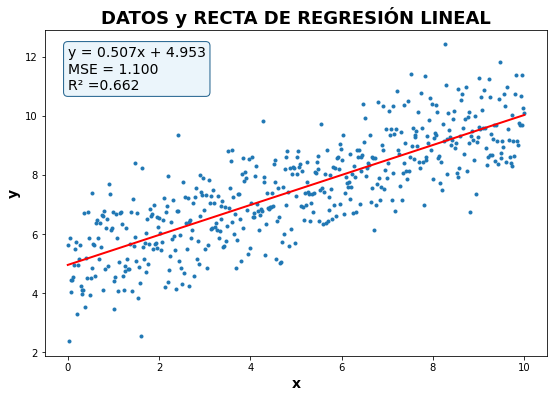

In [28]:
x=x_data

plt.figure(figsize=(9, 6))
plt.plot(x_data,y_data,'.')

plt.plot(x, float(linreg.coef_) * x + float(linreg.intercept_),
         'r', linewidth= 2)
#          label=f'y = {float(linreg.coef_):.3f}x + {float(linreg.intercept_):2.3f}')
plt.xlabel('x', fontsize=14,fontweight="bold")
plt.ylabel('y', fontsize=14,fontweight="bold")
plt.title(f'DATOS y RECTA DE REGRESIÓN LINEAL',fontsize=18,fontweight="bold")
plt.text(0, 10.9,f'y = {float(linreg.coef_):.3f}x + {float(linreg.intercept_):2.3f}\nMSE = {mse:.3f}\nR\u00b2 ={r2:.3f}',
         fontsize=14,
         bbox=dict(boxstyle="round",
                   ec=('#1F618D'),
                   fc=('#EBF5FB'),
                   ))
plt.show()